# Análise de Preços de Casas e Modelagem Preditiva

Este notebook tem como objetivo explorar um conjunto de dados de preços de casas, analisar as variáveis
mais relevantes e construir um modelo de Regressão Linear Multivariada para prever o preço de venda de novas casas.


## Importação de Bibliotecas e Configuração


In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 28.3 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.4 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 37.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install scikit-learn

  Using cached scipy-1.14.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 21.6 MB/s eta 0:00:0031m23.1 MB/s eta 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.2 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [12]:
# Bibliotecas padrão do Python
import os
import sys
import shutil
from zipfile import ZipFile

# Bibliotecas para análise de dados e manipulação
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para aprendizado de máquina e métricas
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Biblioteca para estatísticas
from scipy.stats import pearsonr

# Bibliotecas para salvar e carregar modelos
import pickle

## Carregamento e Visualização dos Dados

Carregando o dataset `kc_house_data.csv` e exibindo as primeiras linhas para familiarização com as variáveis.

In [16]:
kaggle_path = '/home/luiscardoso/Documentos/Repositories/cp6-ia/kc_house_data.csv'

try:
    df_house_sales = pd.read_csv(kaggle_path)
    print(df_house_sales.head())
    print(df_house_sales.info())
except FileNotFoundError:
    print("Erro: O arquivo CSV não foi encontrado.")


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

## Análise Exploratória

### Distribuição da Variável Target (`price`)

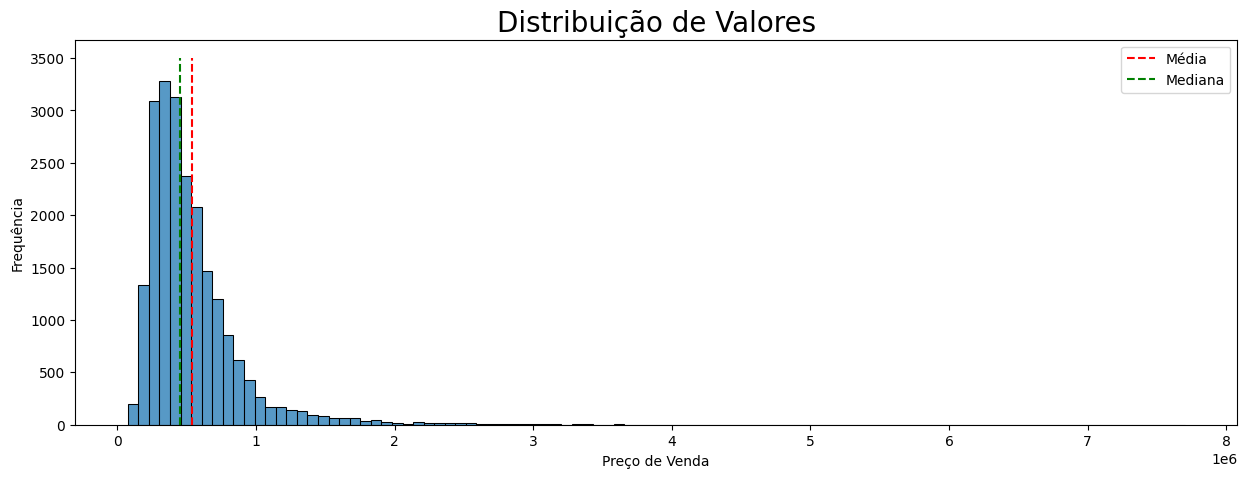

In [17]:
# Estatísticas descritivas
df_house_sales['price'].describe()

# Histograma e distribuição cumulativa
plt.figure(figsize=(15, 5))
sns.histplot(x=df_house_sales['price'], bins=100)
plt.vlines(x=df_house_sales['price'].mean(), ymax=3500, ymin=0, colors='r', linestyles='dashed', label='Média')
plt.vlines(x=df_house_sales['price'].median(), ymax=3500, ymin=0, colors='g', linestyles='dashed', label='Mediana')
plt.title('Distribuição de Valores', fontsize=20)
plt.xlabel('Preço de Venda')
plt.ylabel('Frequência')
plt.legend()
plt.show()

O gráfico mostra a distribuição dos preços de venda das casas, e podemos notar uma assimetria à direita, o que indica que a maioria das casas está em uma faixa de preço mais acessível, enquanto poucas têm preços muito elevados. Essas casas mais caras criam uma cauda na direita do gráfico, afetando a média, que fica maior que a mediana devido a esses valores extremos.

Além disso, observei que a mediana pode representar melhor o "preço típico" das casas, pois não é influenciada por outliers como a média. Esse tipo de distribuição sugere que, se formos usar esses dados em modelos preditivos, pode ser interessante transformar os valores (por exemplo, aplicando logaritmo) para reduzir a assimetria e melhorar a performance do modelo.

### Skewness e Kurtosis

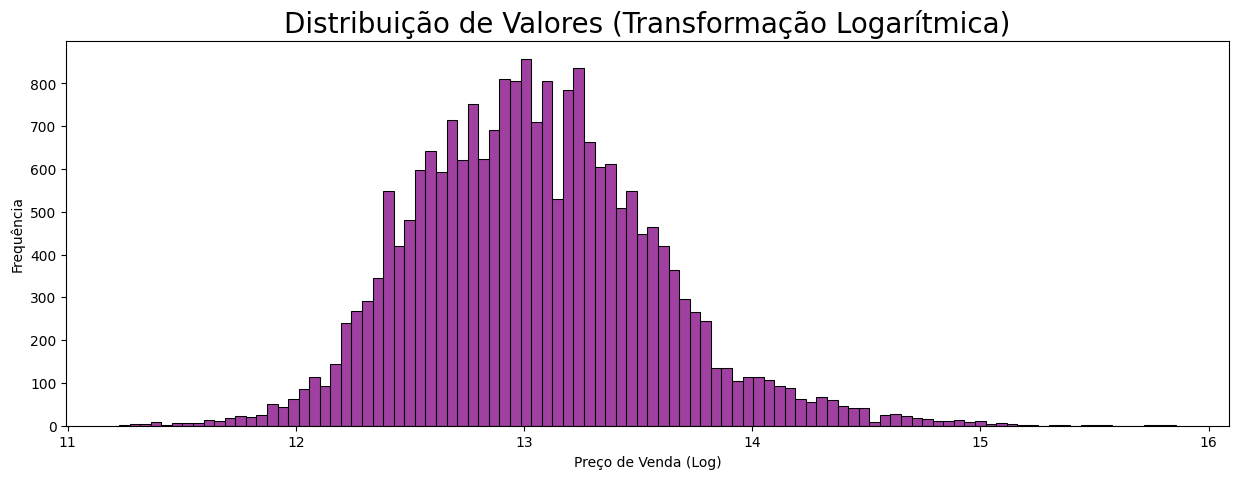


Skewness: 4.024
Kurtosis: 34.586


In [18]:
# Transformação logarítmica para reduzir skewness e curtose
df_house_sales['price_log'] = np.log1p(df_house_sales['price'])

# Visualizar histograma após a transformação
plt.figure(figsize=(15, 5))
sns.histplot(x=df_house_sales['price_log'], bins=100, color='purple')
plt.title('Distribuição de Valores (Transformação Logarítmica)', fontsize=20)
plt.xlabel('Preço de Venda (Log)')
plt.ylabel('Frequência')
plt.show()

print("\nSkewness: {:.3f}".format(df_house_sales['price'].skew()))
print("Kurtosis: {:.3f}". format(df_house_sales['price'].kurt()))


Aqui, estamos analisando duas métricas de distribuição da variável price: skewness (assimetria) e kurtosis (curtose).

Skewness (Assimetria): A assimetria de 4.024 indica que a distribuição dos preços de venda é altamente assimétrica à direita. Esse valor confirma o que vimos no histograma, onde a cauda se estende para a direita devido a alguns valores muito altos (outliers). Em geral, uma assimetria maior que 1 já é considerada alta, então 4.024 é um valor bastante significativo.

Kurtosis (Curtose): A curtose de 34.586 indica que a distribuição tem uma cauda mais pesada que a de uma distribuição normal (onde a curtose é 3). Esse valor tão alto sugere que há muitos valores extremos ou outliers, o que resulta em uma cauda mais densa e frequente.

Esses valores sugerem que o conjunto de dados tem muitos outliers e uma distribuição concentrada com alguns valores muito elevados.

## Análise de Correlação

Seleciono apenas as variáveis numéricas para identificar as correlações mais altas com `price`.

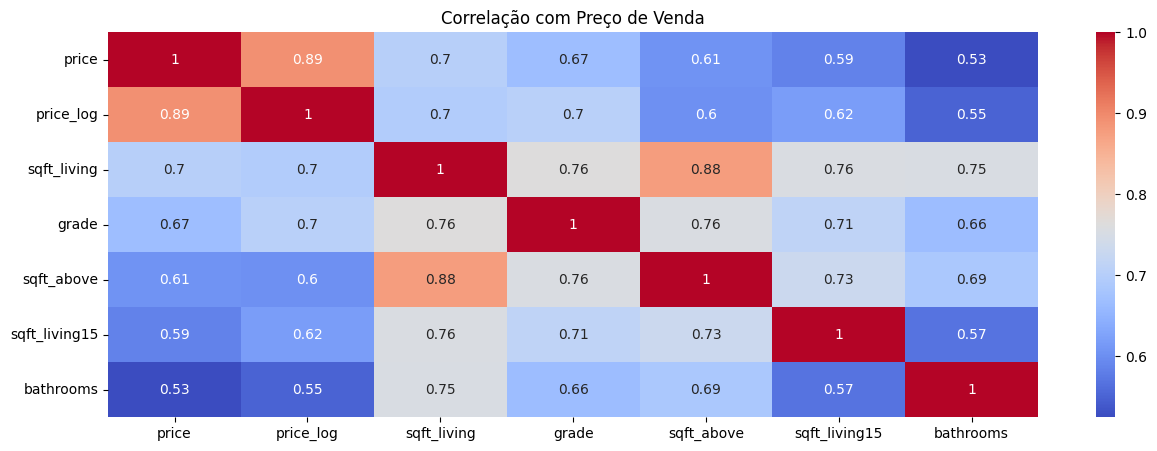

In [19]:
# Seleção de variáveis numéricas e matriz de correlação
df_house_sales_new = df_house_sales.copy()
df_house_sales_new.drop(columns=['date', 'id'], inplace=True)
var_num = df_house_sales_new.select_dtypes(include=[np.number])
corr_var = var_num.corr(method='pearson')

# Visualização das variáveis mais correlacionadas
sort_corr = corr_var['price'].abs().sort_values(ascending=False)
high_corr = sort_corr[sort_corr > 0.5].index
corr_var = corr_var.loc[high_corr, high_corr]

plt.figure(figsize=(15, 5))
sns.heatmap(corr_var, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlação com Preço de Venda')
plt.show()

As variáveis sqft_living, grade, e sqft_above são as mais correlacionadas com o preço de venda, indicando que a área do imóvel e a qualidade da construção são fatores determinantes no valor do imóvel. Variáveis com correlações mais baixas, como bathrooms, ainda têm um efeito, mas não são tão influentes quanto o tamanho e a qualidade. Para uma análise mais robusta, essas correlações poderiam ser usadas para selecionar variáveis em um modelo de previsão do preço de venda.

Esse boxplot para examina a relação entre `price` e variáveis categóricas, como `grade`.

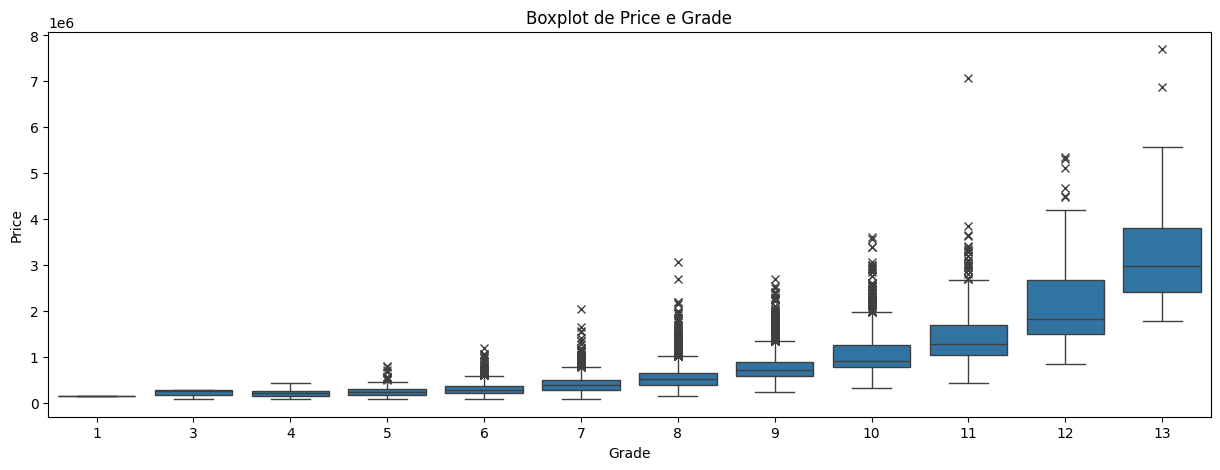

In [20]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_house_sales_new, x="grade", y="price", notch=False, showcaps=True, flierprops={"marker": "x"})
plt.title('Boxplot de Price e Grade')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

## Detecção de Outliers

Para reduzir o impacto dos outliers, estou normalizando a distribuição, especialmente em variáveis de preço que tendem a ser enviesadas para a direita (ou seja, com valores altos).

In [21]:
# Cálculo do IQR para identificar outliers
Q1 = df_house_sales['price'].quantile(0.25)
Q3 = df_house_sales['price'].quantile(0.75)
IQR = Q3 - Q1

# Limites de outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df_house_sales[(df_house_sales['price'] < limite_inferior) | (df_house_sales['price'] > limite_superior)]
print(f"Outliers detectados: {outliers.shape[0]}")

df_house_sales_new['price_log'] = np.log(df_house_sales_new['price'])


Outliers detectados: 1146



## Modelagem de Regressão Linear

### Preparação dos Dados

Seleciono `sqft_living` como variável preditora e `price` como variável alvo para um modelo inicial de regressão linear.


In [22]:
X = df_house_sales[['sqft_living', 'grade', 'bathrooms', 'sqft_above']]
y = df_house_sales['price']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Treinamento do Modelo


In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

print(f"Intercepto: {lin_reg.intercept_}, Coeficiente: {lin_reg.coef_}")

Intercepto: 539401.9671596601, Coeficiente: [231718.17103872 131966.8676252  -25733.61272659 -64365.21312748]


### Avaliação do Modelo

Métricas como MAE, MSE, RMSE e R² para avaliar o desempenho do modelo.

In [24]:
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred_lin)
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred_lin)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_true=y_test, y_pred=y_pred_lin)
rho = pearsonr(y_test, y_pred_lin)

resultados = pd.DataFrame({
    "Métrica": ["MAE", "MSE", "RMSE", "R2", "Correlação de Pearson"],
    "Valor": [MAE, MSE, RMSE, R2, rho[0]]
})
print(resultados)

                 Métrica         Valor
0                    MAE  1.645876e+05
1                    MSE  6.841674e+10
2                   RMSE  2.615659e+05
3                     R2  5.474386e-01
4  Correlação de Pearson  7.402434e-01


## Serialização do Modelo

Salvando o modelo para uso posterior.

In [26]:
with open('scaler.pickle', 'wb') as file:
    pickle.dump(scaler, file)

with open('modelo_regressao_linear.pickle', 'wb') as file:
    pickle.dump(lin_reg, file)